In [1]:
#import libraries and read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\katsh\Documents\Honors 2nd Semester\Data Science and Analytics\Topic_Survey_Assignment.csv')

In [3]:
print(df.head())  # Display the first few rows
print(df.info())  # Get a summary of the dataset

                   Unnamed: 0  Very interested  Somewhat interested  \
0   Big Data (Spark / Hadoop)             1332                  729   
1  Data Analysis / Statistics             1688                  444   
2             Data Journalism              429                 1081   
3          Data Visualization             1340                  734   
4               Deep Learning             1263                  770   

   Not interested  
0             127  
1              60  
2             610  
3             102  
4             136  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           6 non-null      object
 1   Very interested      6 non-null      int64 
 2   Somewhat interested  6 non-null      int64 
 3   Not interested       6 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 324.0+ bytes
None

In [4]:
# Check for missing values
print(df.isnull().sum())

# If there are missing values, you can decide to drop or fill them
df.dropna(inplace=True)  # Example to drop missing values


Unnamed: 0             0
Very interested        0
Somewhat interested    0
Not interested         0
dtype: int64


In [5]:
print(df.describe())


       Very interested  Somewhat interested  Not interested
count         6.000000             6.000000        6.000000
mean       1280.166667           705.833333      184.833333
std         451.455166           231.135819      210.344876
min         429.000000           444.000000       60.000000
25%        1280.250000           540.000000       81.000000
50%        1336.000000           731.500000      114.500000
75%        1556.750000           761.000000      133.750000
max        1688.000000          1081.000000      610.000000


In [6]:
print(df.columns)


Index(['Unnamed: 0', 'Very interested', 'Somewhat interested',
       'Not interested'],
      dtype='object')


In [7]:
# Set the first column as the index
df.set_index(df.columns[0], inplace=True)


Bar Graph

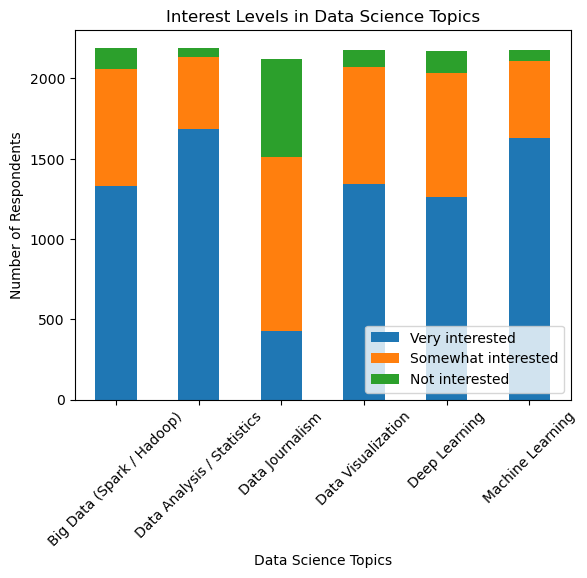

In [9]:
# Plot bar graph
df.plot(kind='bar', stacked=True)
plt.title('Interest Levels in Data Science Topics')
plt.xlabel('Data Science Topics')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


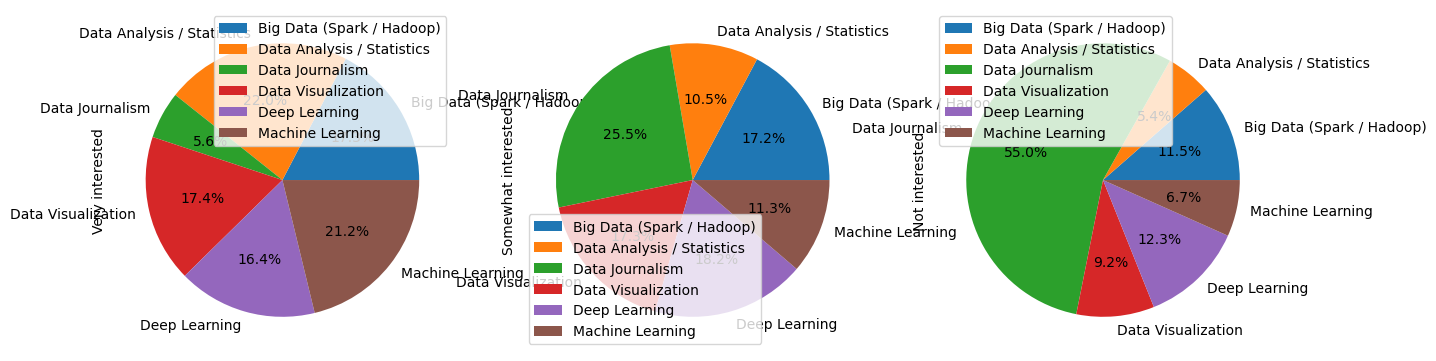

In [10]:
# Plot pie charts for each topic
df.plot(kind='pie', subplots=True, figsize=(15, 10), autopct='%1.1f%%')
plt.show()


In [11]:
print(df.head())


                            Very interested  Somewhat interested  \
Unnamed: 0                                                         
Big Data (Spark / Hadoop)              1332                  729   
Data Analysis / Statistics             1688                  444   
Data Journalism                         429                 1081   
Data Visualization                     1340                  734   
Deep Learning                          1263                  770   

                            Not interested  
Unnamed: 0                                  
Big Data (Spark / Hadoop)              127  
Data Analysis / Statistics              60  
Data Journalism                        610  
Data Visualization                     102  
Deep Learning                          136  


Sorting of the dataframe in descending order of Very interested.

In [13]:
# Sort the DataFrame by 'Very interested' column in descending order
most_interested = df.sort_values(by='Very interested', ascending=False)

print("Topics sorted by the number of respondents who are 'Very interested':")
print(most_interested)



Topics sorted by the number of respondents who are 'Very interested':
                            Very interested  Somewhat interested  \
Unnamed: 0                                                         
Data Analysis / Statistics             1688                  444   
Machine Learning                       1629                  477   
Data Visualization                     1340                  734   
Big Data (Spark / Hadoop)              1332                  729   
Deep Learning                          1263                  770   
Data Journalism                         429                 1081   

                            Not interested  
Unnamed: 0                                  
Data Analysis / Statistics              60  
Machine Learning                        74  
Data Visualization                     102  
Big Data (Spark / Hadoop)              127  
Deep Learning                          136  
Data Journalism                        610  


In [14]:
# Calculate percentages
percentages = df.div(df.sum(axis=1), axis=0) * 100
print("Percentage of respondents for each interest level:")
print(percentages)


Percentage of respondents for each interest level:
                            Very interested  Somewhat interested  \
Unnamed: 0                                                         
Big Data (Spark / Hadoop)         60.877514            33.318099   
Data Analysis / Statistics        77.007299            20.255474   
Data Journalism                   20.235849            50.990566   
Data Visualization                61.580882            33.731618   
Deep Learning                     58.229599            35.500231   
Machine Learning                  74.724771            21.880734   

                            Not interested  
Unnamed: 0                                  
Big Data (Spark / Hadoop)         5.804388  
Data Analysis / Statistics        2.737226  
Data Journalism                  28.773585  
Data Visualization                4.687500  
Deep Learning                     6.270171  
Machine Learning                  3.394495  


In [15]:
# Most popular topic
most_popular_topic = most_interested.index[0]
most_popular_value = most_interested.iloc[0]['Very interested']

# Least popular topic
least_popular_topic = most_interested.index[-1]
least_popular_value = most_interested.iloc[-1]['Very interested']

print(f"Most popular topic: {most_popular_topic} with {most_popular_value} respondents who are 'Very interested'")
print(f"Least popular topic: {least_popular_topic} with {least_popular_value} respondents who are 'Very interested'")


Most popular topic: Data Analysis / Statistics with 1688 respondents who are 'Very interested'
Least popular topic: Data Journalism with 429 respondents who are 'Very interested'


Question 2

In [17]:
df = pd.read_csv(r'C:\Users\katsh\Documents\Honors 2nd Semester\Data Science and Analytics\Topic_Survey_Assignment.csv')

# Set the first column as the index
df.set_index(df.columns[0], inplace=True)

# Calculate percentages for 'Very interested', 'Somewhat interested', 'Not interested'
total_respondents = 2233
df_percent = df.div(total_respondents) * 100

# Round percentages to 2 decimal places
df_percent = df_percent.round(2)

# Sort DataFrame by 'Very interested' column
df_sorted = df_percent.sort_values(by='Very interested', ascending=False)


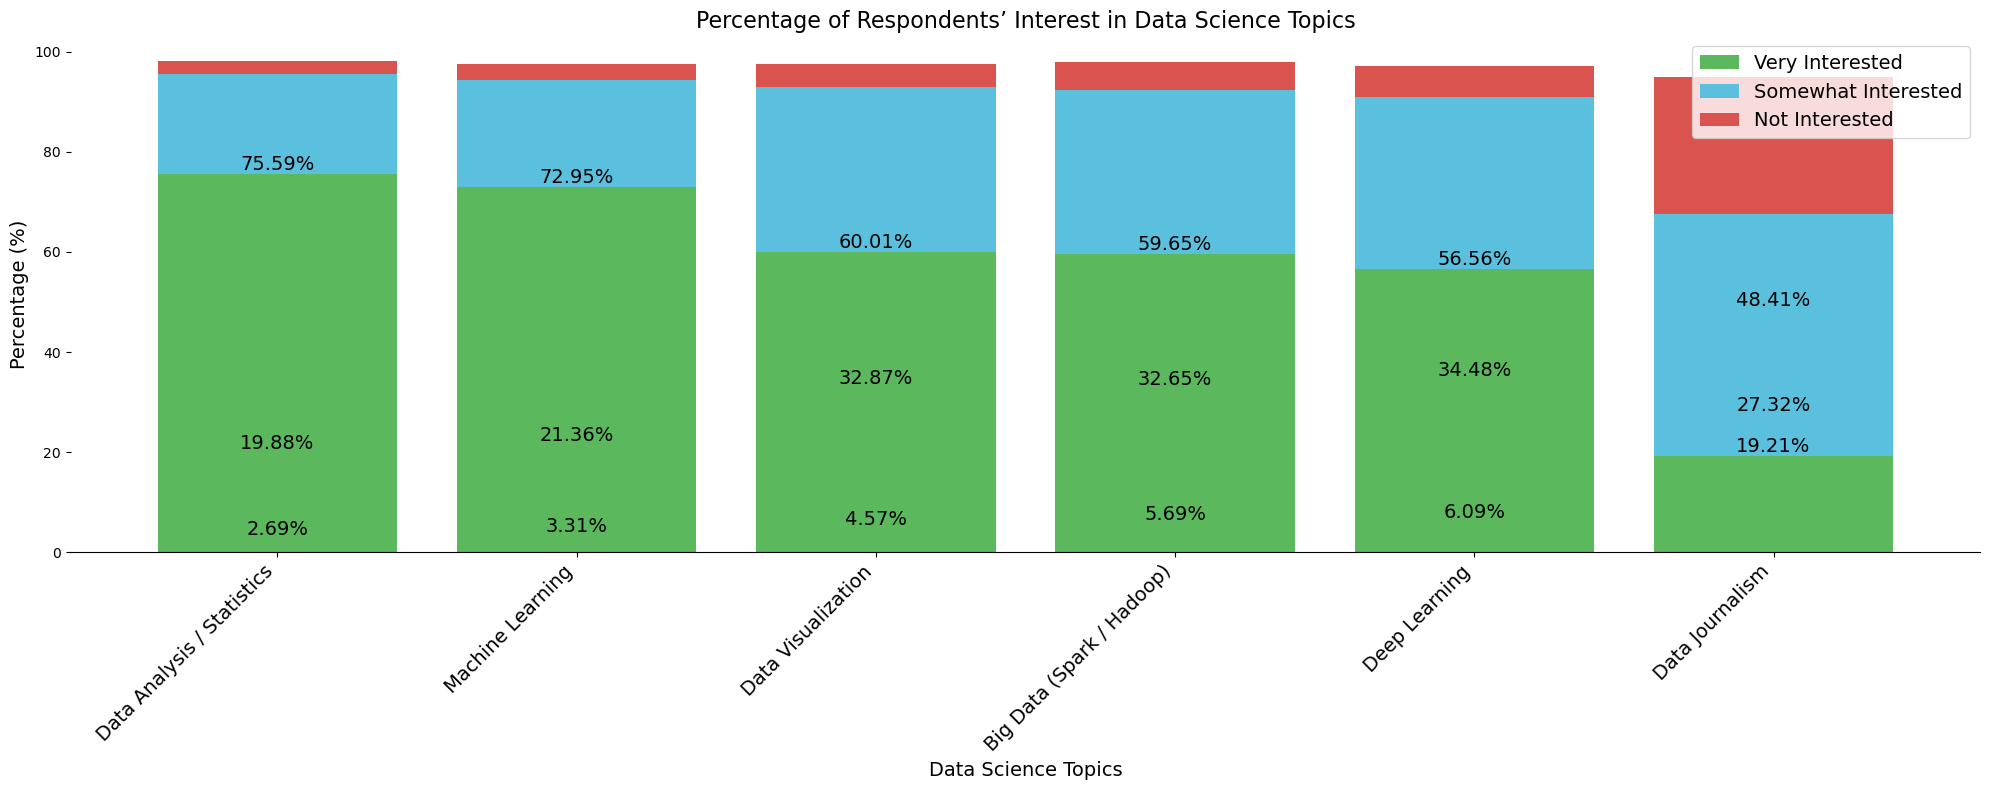

In [18]:
# Create the plot
fig, ax = plt.subplots(figsize=(20, 8))

# Plot bars
bar_width = 0.8
bar_positions = range(len(df_sorted))

# Plot bars for each category
bars_very_interested = ax.bar(bar_positions, df_sorted['Very interested'], bar_width, color='#5cb85c', label='Very Interested')
bars_somewhat_interested = ax.bar(bar_positions, df_sorted['Somewhat interested'], bar_width, bottom=df_sorted['Very interested'], color='#5bc0de', label='Somewhat Interested')
bars_not_interested = ax.bar(bar_positions, df_sorted['Not interested'], bar_width, bottom=df_sorted['Very interested'] + df_sorted['Somewhat interested'], color='#d9534f', label='Not Interested')

# Add percentages above the bars
for bars in [bars_very_interested, bars_somewhat_interested, bars_not_interested]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=14)

# Customize the chart
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_sorted.index, rotation=45, ha='right', fontsize=14)
ax.set_xlabel('Data Science Topics', fontsize=14)
ax.set_ylabel('Percentage (%)', fontsize=14)
ax.set_title('Percentage of Respondents’ Interest in Data Science Topics', fontsize=16)
ax.legend(fontsize=14)

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()


Part 2

In [20]:
# Import libraries
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

# For tree-based model 
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [21]:
df = pd.read_csv(r'C:\Users\katsh\Documents\Honors 2nd Semester\Data Science and Analytics\ClaimsData.csv')

# Inspect the first few rows and summary statistics
print(df.head())
print(df.describe())
print(df.info())


      Claim Category   Mileage  AgeP  ModelYear PreOwned ServHist
0  42089.53    Sedan   99754.4    40       2016      Yes      Yes
1  24097.69      SAV   63926.9    43       2018       No       No
2  19190.63    Small  134829.8    28       2018       No      Yes
3  20574.27    Small   59107.4    28       2018       No      Yes
4  26734.33      SAV  132746.9    22       2017       No      Yes
              Claim        Mileage         AgeP   ModelYear
count   1500.000000    1500.000000  1500.000000  1500.00000
mean   24664.065427   99167.131467    39.224667  2016.36600
std     5630.144088   30665.641808    13.668312     1.70704
min    10228.780000   22681.100000    17.000000  2011.00000
25%    20804.477500   77330.450000    28.000000  2015.00000
50%    24209.870000   95939.200000    37.000000  2017.00000
75%    27818.390000  118311.500000    48.250000  2018.00000
max    50894.930000  202394.300000    81.000000  2019.00000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 

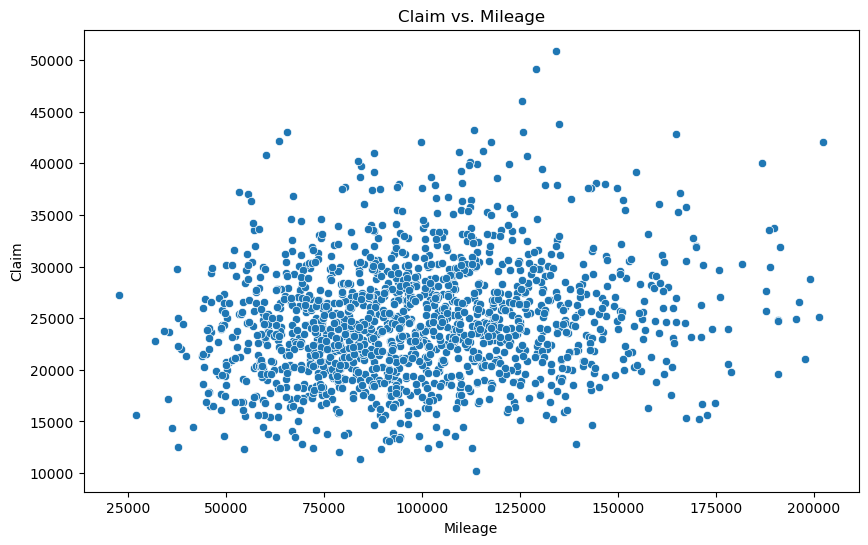

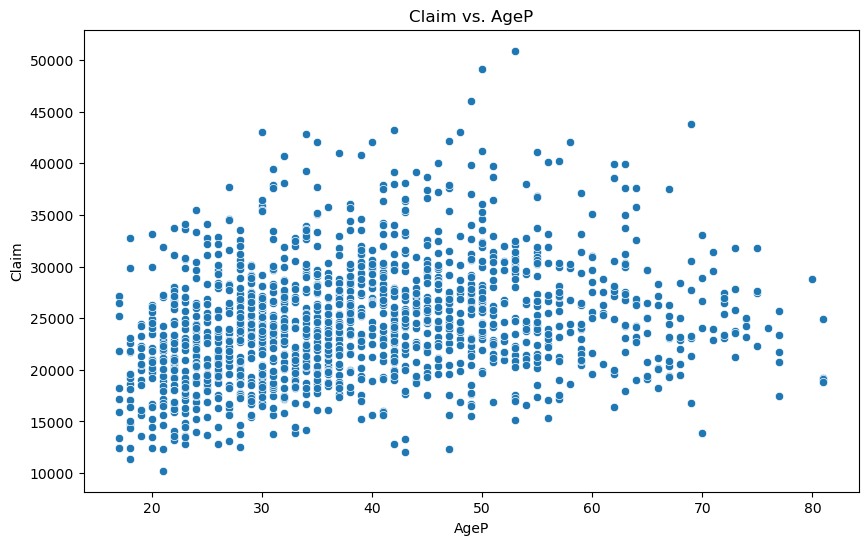

In [22]:
# Scatterplot 1: Claim amount vs. Mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Claim', data=df)
plt.title('Claim vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Claim')
plt.show()

# Scatterplot 2: Claim amount vs. Age of Vehicle
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AgeP', y='Claim', data=df)
plt.title('Claim vs. AgeP')
plt.xlabel('AgeP')
plt.ylabel('Claim')
plt.show()


In [23]:
# Calculate the mean claim amount for pre-owned and not pre-owned vehicles
mean_claim_pre_owned = df.groupby('PreOwned')['Claim'].mean()

print("Mean Claim Amount by Pre-Owned Status:")
print(mean_claim_pre_owned)

Mean Claim Amount by Pre-Owned Status:
PreOwned
No     23435.093700
Yes    26987.035106
Name: Claim, dtype: float64


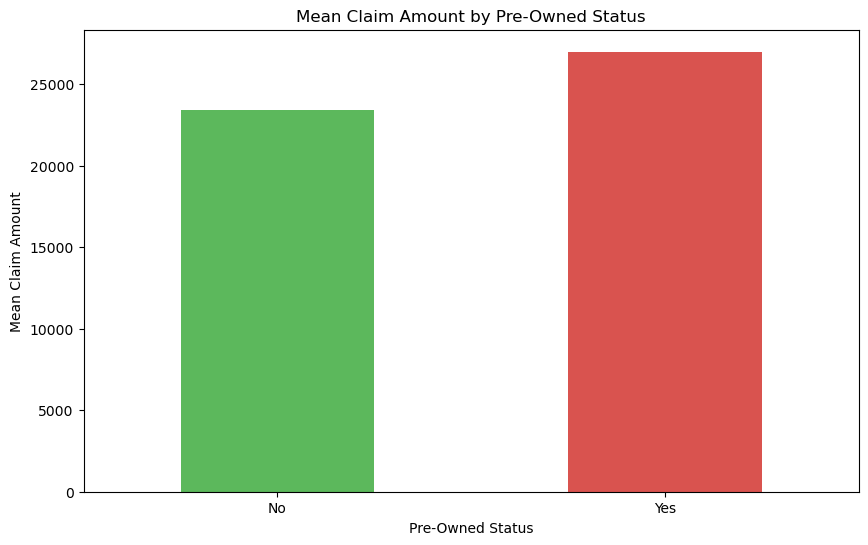

In [24]:
# Plotting the mean claim amounts for pre-owned vs. non-pre-owned vehicles
plt.figure(figsize=(10, 6))
mean_claim_pre_owned.plot(kind='bar', color=['#5cb85c', '#d9534f'])

# Adding titles and labels
plt.title('Mean Claim Amount by Pre-Owned Status')
plt.xlabel('Pre-Owned Status')
plt.ylabel('Mean Claim Amount')
plt.xticks(rotation=0)  # To keep the x-axis labels horizontal

# Displaying the plot
plt.show()

In [25]:
# Calculate the mean claim amount for vehicles with and without service histories
mean_claim_service_history = df.groupby('ServHist')['Claim'].mean()

print("Mean Claim by Service History Status:")
print(mean_claim_service_history)


Mean Claim by Service History Status:
ServHist
No     24368.474882
Yes    24780.543485
Name: Claim, dtype: float64


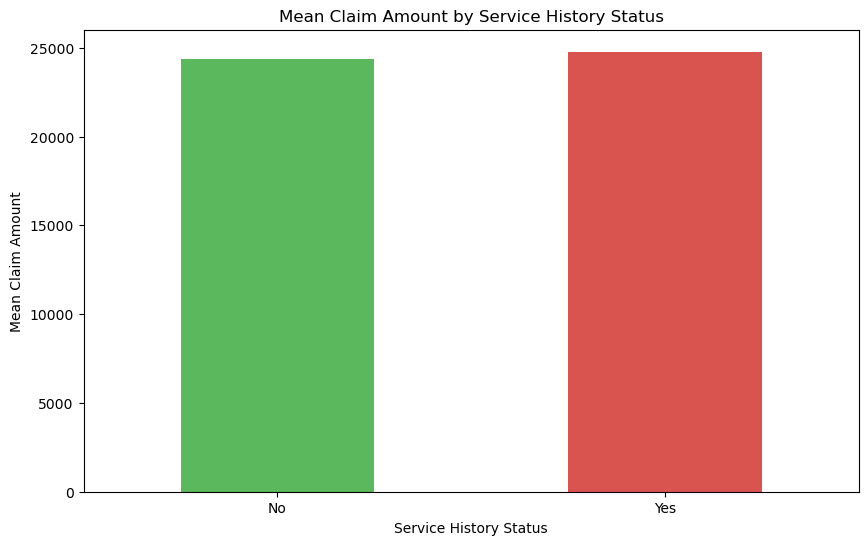

In [26]:
# Plotting the mean claim amounts for vehicles with and without service histories
plt.figure(figsize=(10, 6))
mean_claim_service_history.plot(kind='bar', color=['#5cb85c', '#d9534f'])

# Adding titles and labels
plt.title('Mean Claim Amount by Service History Status')
plt.xlabel('Service History Status')
plt.ylabel('Mean Claim Amount')
plt.xticks(rotation=0)  # To keep the x-axis labels horizontal

# Displaying the plot
plt.show()

In [27]:
# Calculate the mean claim amount for each vehicle category
mean_claim_by_category = df.groupby('Category')['Claim'].mean()

print("Mean Claim Amount by Vehicle Category:")
print(mean_claim_by_category)


Mean Claim Amount by Vehicle Category:
Category
SAV      25567.220256
SUV      29439.955177
Sedan    23759.341389
Small    21458.093665
Super    33107.498750
Name: Claim, dtype: float64


In [28]:
# Calculate the mean claim amount for each model year
mean_claim_by_model_year = df.groupby('ModelYear')['Claim'].mean()

print("Mean Claim Amount by Model Year:")
print(mean_claim_by_model_year)


Mean Claim Amount by Model Year:
ModelYear
2011    21251.196667
2012    22089.076316
2013    22797.422576
2014    24559.396422
2015    24396.627463
2016    24930.396192
2017    24859.324408
2018    24844.633413
2019    25487.106147
Name: Claim, dtype: float64


Insights from Mean Claim Amount Analysis

Higher Claims in Super and SUV Categories:
The Super category shows the highest mean claim amount (33,107.50), followed by SUV (29,439.96). This suggests that vehicles in these categories are likely associated with higher repair or replacement costs, possibly due to their higher market value and advanced features, resulting in larger insurance claims. Additionally, these vehicles might be involved in more severe accidents or have higher insurance premiums due to their value.

Moderate Increase by Model Year:
The mean claim amount generally increases from 2011 to 2019, with the mean rising from 21,251.20 to 25,487.11. This trend might reflect inflation, higher repair costs for newer technologies, or the incorporation of more expensive components in newer vehicles. It may also indicate that newer vehicles are insured at higher values, leading to higher claims when incidents occur.

Possible Reasons for Differences Observed

Vehicle Value and Features: Higher claim amounts for categories like Super and SUV could be due to their higher value and more expensive parts, leading to larger claims when these vehicles are involved in accidents.

Age of Vehicle: As vehicles age, they might either depreciate in value, leading to smaller claims, or, conversely, newer vehicles might be more expensive to repair due to newer technologies, leading to larger claims.

Market Conditions: The slight increase in claim amounts over the years could be influenced by broader economic factors such as inflation or changes in the automotive industry's repair and part replacement costs.


Fitting a Tree Based Model

In [32]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Claim        0
Category     0
Mileage      0
AgeP         0
ModelYear    0
PreOwned     0
ServHist     0
dtype: int64


In [36]:
# Initialize the OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity

# One-hot encode the "Category" variable
category_encoded = ohe.fit_transform(df[['Category']])

# Get the column names for the encoded features
columns = ohe.get_feature_names_out(['Category'])

# Create a DataFrame with the encoded features
category_encoded_df = pd.DataFrame(category_encoded, columns=columns)

# Add the encoded features to the original dataframe
df = pd.concat([df, category_encoded_df], axis=1)

# Drop the original "Category" column if desired
# df.drop('Category', axis=1, inplace=True)

# View the updated dataframe
print("DataFrame with One-Hot Encoded Category:")
print(df.head())


DataFrame with One-Hot Encoded Category:
      Claim Category   Mileage  AgeP  ModelYear PreOwned ServHist  \
0  42089.53    Sedan   99754.4    40       2016      Yes      Yes   
1  24097.69      SAV   63926.9    43       2018       No       No   
2  19190.63    Small  134829.8    28       2018       No      Yes   
3  20574.27    Small   59107.4    28       2018       No      Yes   
4  26734.33      SAV  132746.9    22       2017       No      Yes   

   Category_SUV  Category_Sedan  Category_Small  Category_Super  
0           0.0             1.0             0.0             0.0  
1           0.0             0.0             0.0             0.0  
2           0.0             0.0             1.0             0.0  
3           0.0             0.0             1.0             0.0  
4           0.0             0.0             0.0             0.0  


In [46]:
# Select features: Mileage, AgeP, and the category columns using .loc[]
X = df.loc[:, ['Mileage', 'AgeP', 'Category_SUV', 'Category_Sedan', 'Category_Small', 'Category_Super']]

# Select the response variable y (assuming the target is 'Claim')
y = df['Claim']

# View the features (X) and response (y)
print("Features (X):")
print(X.head())

print("\nResponse (y):")
print(y.head())



Features (X):
    Mileage  AgeP  Category_SUV  Category_Sedan  Category_Small  \
0   99754.4    40           0.0             1.0             0.0   
1   63926.9    43           0.0             0.0             0.0   
2  134829.8    28           0.0             0.0             1.0   
3   59107.4    28           0.0             0.0             1.0   
4  132746.9    22           0.0             0.0             0.0   

   Category_Super  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  

Response (y):
0    42089.53
1    24097.69
2    19190.63
3    20574.27
4    26734.33
Name: Claim, dtype: float64


In [44]:
print(df.columns)  #The actual column names after one-hot encoding


Index(['Claim', 'Category', 'Mileage', 'AgeP', 'ModelYear', 'PreOwned',
       'ServHist', 'Category_SUV', 'Category_Sedan', 'Category_Small',
       'Category_Super'],
      dtype='object')


In [48]:
X.head()

,Mileage,AgeP,Category_SUV,Category_Sedan,Category_Small,Category_Super
0,99754.4,40,0.0,1.0,0.0,0.0
1,63926.9,43,0.0,0.0,0.0,0.0
2,134829.8,28,0.0,0.0,1.0,0.0
3,59107.4,28,0.0,0.0,1.0,0.0
4,132746.9,22,0.0,0.0,0.0,0.0


In [50]:
y.head()

0    42089.53
1    24097.69
2    19190.63
3    20574.27
4    26734.33
Name: Claim, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Split the data into the training set and test set
# Set random_state=0
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit data to a tree-based model (Decision Tree Regressor)
# Set random_state=0
tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Calculate the mean squared error (MSE) prior to pruning
error = mean_squared_error(y_test, y_pred)

# Print the MSE before pruning
print(f"Mean Squared Error (MSE) before pruning: {error}")


Mean Squared Error (MSE) before pruning: 52090533.21517519


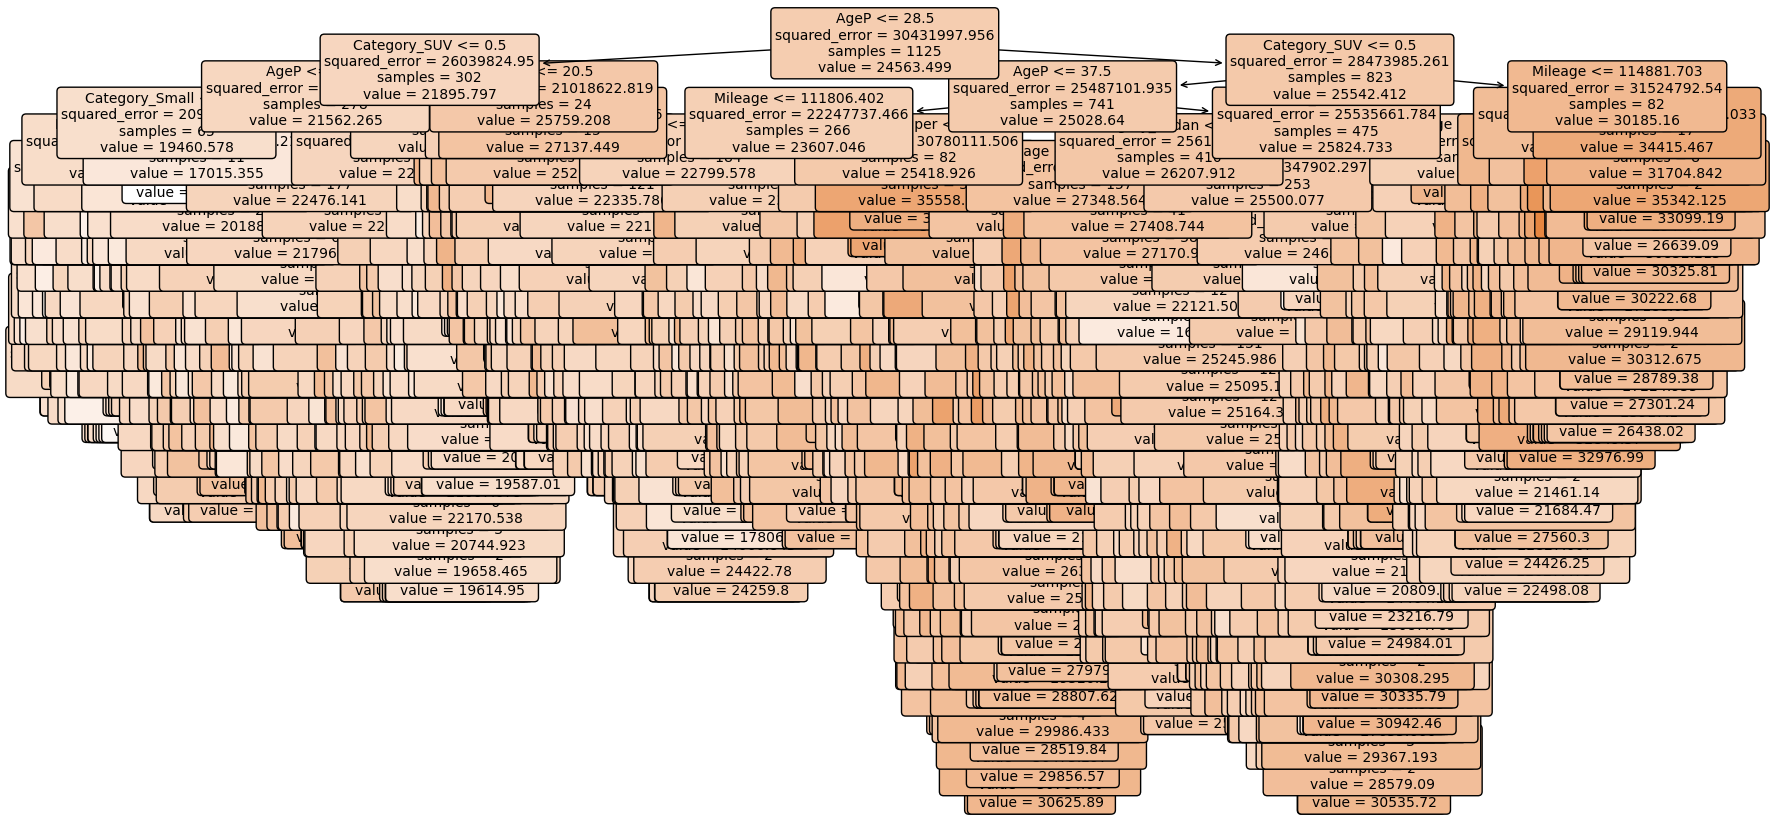

In [58]:
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree
# from sklearn import tree

# # Plot the unpruned tree
# plt.figure(figsize=(20,10))  # Adjust the figure size for better readability
# plot_tree(model, filled=True, feature_names=features.columns, rounded=True)
# plt.title("Unpruned Decision Tree")
# plt.show()

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the unpruned decision tree
plt.figure(figsize=(20,10))  # Adjust figure size as necessary
plot_tree(tree_model, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.title("Unpruned Decision Tree")
plt.show()


In [62]:
# Replace "reg" with the variable name "Fit data to tree-based model" above
# Since I used `tree_model`, that will replace "reg"
# Example code:
tree_model  # This is the model I used earlier to fit the data


DecisionTreeRegressor(random_state=0)

In [64]:
from sklearn.model_selection import GridSearchCV

# Set up a parameter grid to search for the optimal number of leaf nodes
param_grid = {'max_leaf_nodes': range(2, 20)}

# Use GridSearchCV to find the optimal number of leaf nodes
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameter (optimal number of leaf nodes)
optimal_leaf_nodes = grid_search.best_params_['max_leaf_nodes']
print(f"Optimal number of leaf nodes: {optimal_leaf_nodes}")

# Refit the model using the optimal number of leaf nodes
optimal_tree_model = DecisionTreeRegressor(random_state=0, max_leaf_nodes=optimal_leaf_nodes)
optimal_tree_model.fit(X_train, y_train)

# Make predictions and calculate the new MSE with the optimal tree
y_pred_optimal = optimal_tree_model.predict(X_test)
optimal_error = mean_squared_error(y_test, y_pred_optimal)
print(f"Mean Squared Error with optimal number of leaf nodes: {optimal_error}")


Optimal number of leaf nodes: 14
Mean Squared Error with optimal number of leaf nodes: 28707352.33942948


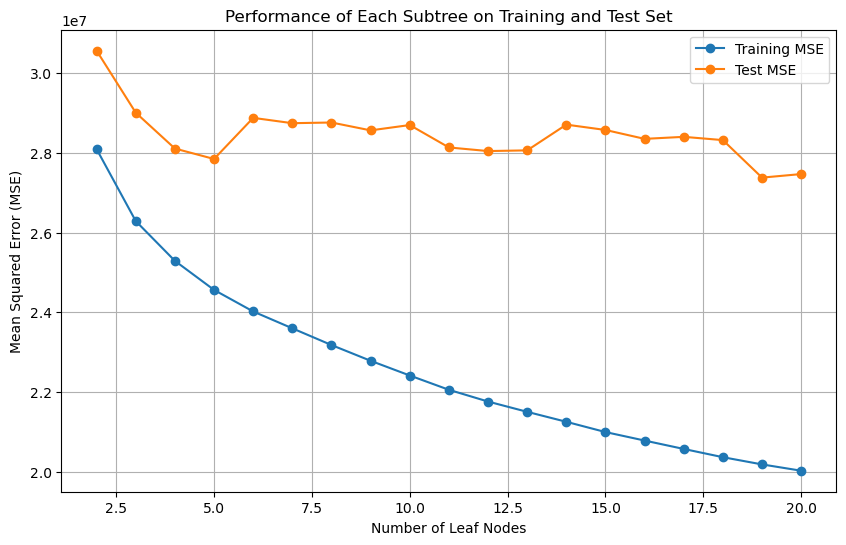

In [66]:
import matplotlib.pyplot as plt

# Define a range of values for max_leaf_nodes
leaf_nodes = range(2, 21)

# Initialize lists to store the MSE for both training and test sets
train_errors = []
test_errors = []

# Loop through the different values for max_leaf_nodes
for leaf in leaf_nodes:
    # Create and fit a Decision Tree model with the current max_leaf_nodes value
    tree_model = DecisionTreeRegressor(random_state=0, max_leaf_nodes=leaf)
    tree_model.fit(X_train, y_train)
    
    # Calculate the MSE for the training set
    y_train_pred = tree_model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_mse)
    
    # Calculate the MSE for the test set
    y_test_pred = tree_model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_errors.append(test_mse)

# Plot the training and test MSE for each value of max_leaf_nodes
plt.figure(figsize=(10, 6))
plt.plot(leaf_nodes, train_errors, label='Training MSE', marker='o')
plt.plot(leaf_nodes, test_errors, label='Test MSE', marker='o')

# Add labels, title, and legend
plt.xlabel('Number of Leaf Nodes')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Performance of Each Subtree on Training and Test Set')
plt.legend()
plt.grid(True)
plt.show()


In [68]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for max_leaf_nodes
param_grid = {'max_leaf_nodes': range(2, 21)}

# Initialize the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=0)

# Set up GridSearchCV to find the best max_leaf_nodes
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameter (optimal number of leaf nodes)
optimal_leaf_nodes = grid_search.best_params_['max_leaf_nodes']
print(f"Optimal maximum leaf nodes: {optimal_leaf_nodes}")

# Train the decision tree model with the optimal number of leaf nodes
optimal_tree_model = DecisionTreeRegressor(random_state=0, max_leaf_nodes=optimal_leaf_nodes)
optimal_tree_model.fit(X_train, y_train)

# Evaluate the performance of the model
y_pred_optimal = optimal_tree_model.predict(X_test)
optimal_error = mean_squared_error(y_test, y_pred_optimal)
print(f"Mean Squared Error with optimal leaf nodes: {optimal_error}")


Optimal maximum leaf nodes: 14
Mean Squared Error with optimal leaf nodes: 28707352.33942948


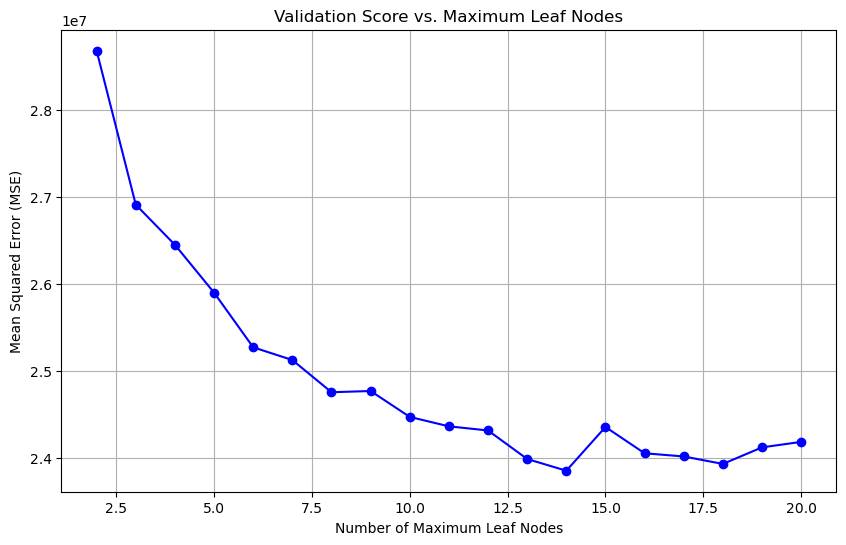

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the results from GridSearchCV
results = grid_search.cv_results_
leaf_nodes = results['param_max_leaf_nodes'].data
mean_test_scores = -results['mean_test_score']  # Negative because GridSearchCV uses negative MSE

# Plot the validation scores
plt.figure(figsize=(10, 6))
plt.plot(leaf_nodes, mean_test_scores, marker='o', linestyle='-', color='b')

# Add labels, title, and grid
plt.xlabel('Number of Maximum Leaf Nodes')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Validation Score vs. Maximum Leaf Nodes')
plt.grid(True)
plt.show()

In [73]:
# Get the optimal number of maximum leaf nodes from GridSearchCV
best_max_leaf_nodes = grid_search.best_params_['max_leaf_nodes']
print(f"Maximum leaf nodes with the highest validation score: {best_max_leaf_nodes}")

# Optionally, also print the best validation score (negative MSE)
best_validation_score = -grid_search.best_score_  # Convert back from negative MSE
print(f"Highest validation score (MSE): {best_validation_score}")

Maximum leaf nodes with the highest validation score: 14
Highest validation score (MSE): 23851783.699728925


In [76]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor with the optimal max_leaf_nodes and random_state
parsimonious_tree_model = DecisionTreeRegressor(random_state=0, max_leaf_nodes=best_max_leaf_nodes)

# Fit the model to the training data
parsimonious_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_parsimonious = parsimonious_tree_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the test set
parsimonious_error = mean_squared_error(y_test, y_pred_parsimonious)
print(f"Mean Squared Error for the parsimonious tree: {parsimonious_error}")


Mean Squared Error for the parsimonious tree: 28707352.33942948


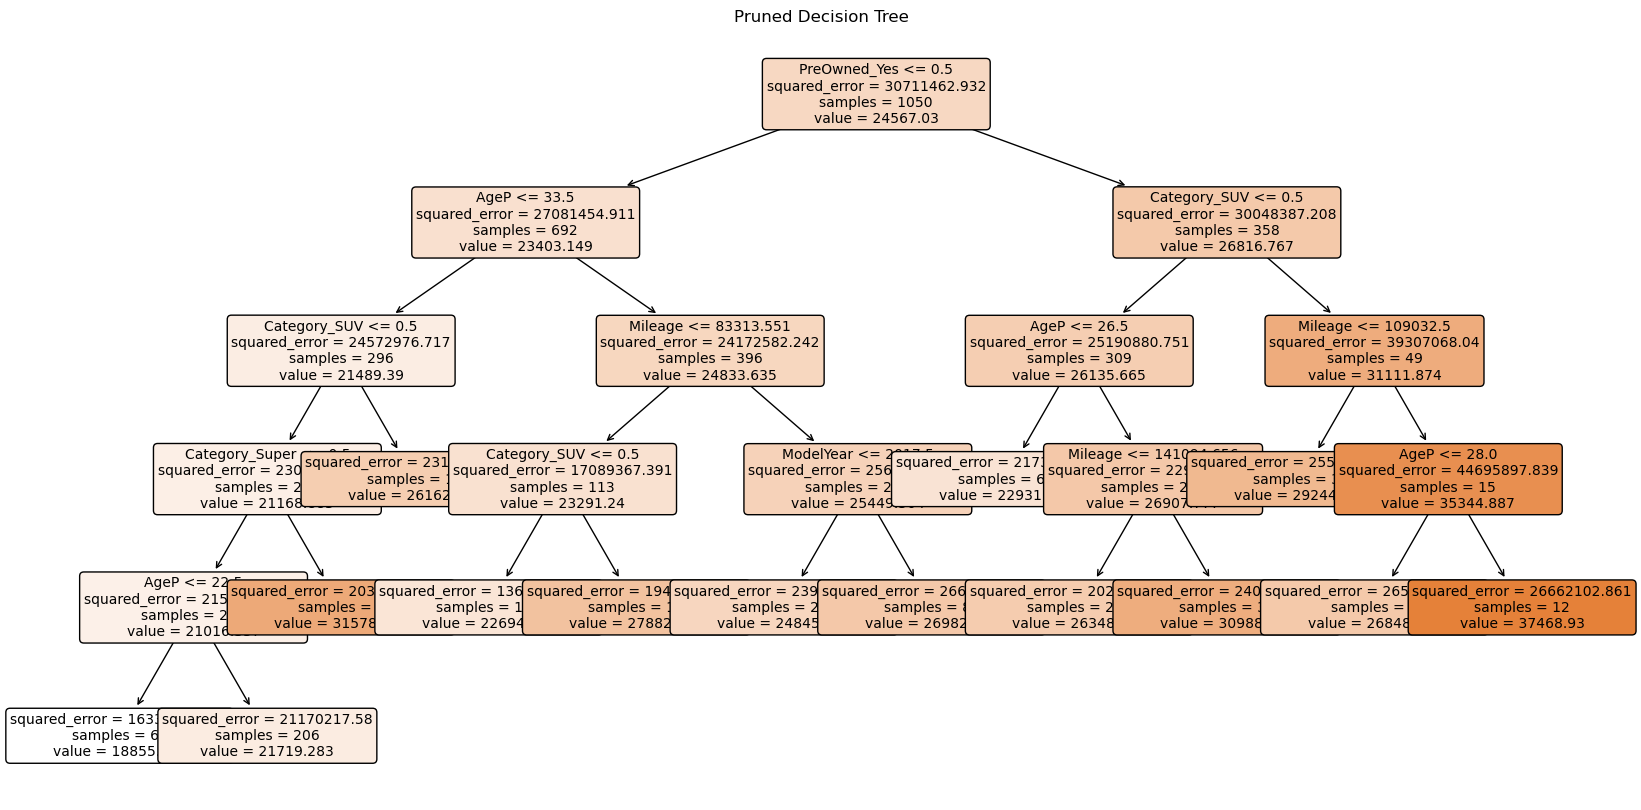

In [78]:
from sklearn.tree import plot_tree

# Plot the pruned decision tree
plt.figure(figsize=(20, 10))
plot_tree(parsimonious_tree_model, 
          feature_names=X.columns, 
          filled=True, 
          rounded=True, 
          class_names=True, 
          fontsize=10)
plt.title('Pruned Decision Tree')
plt.show()


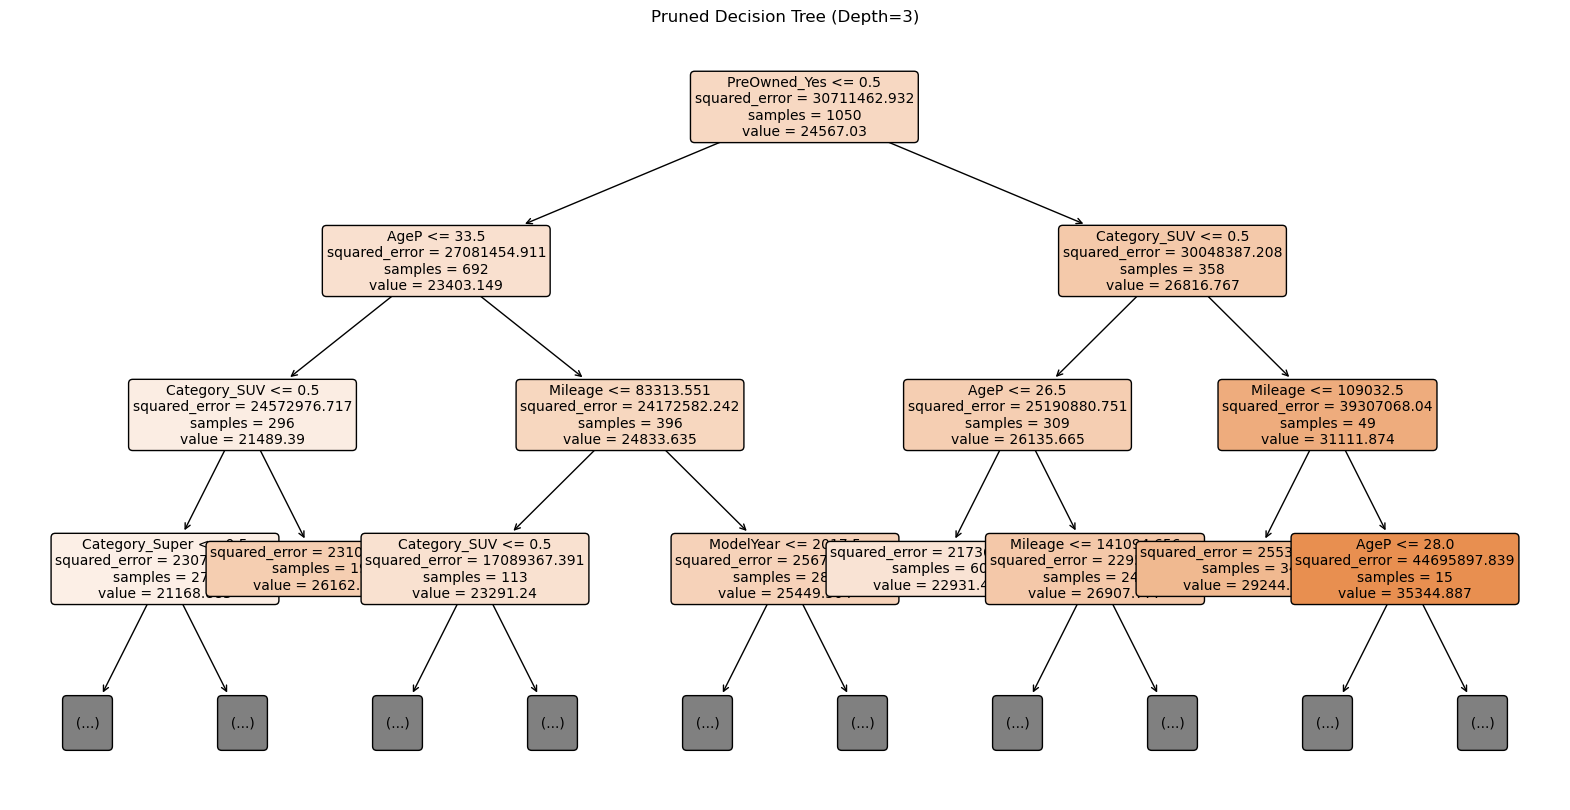

In [80]:
from sklearn.tree import plot_tree

# Define the maximum depth to show (e.g., 3 levels)
max_depth = 3

# Plot the pruned decision tree with limited depth
plt.figure(figsize=(20, 10))
plot_tree(parsimonious_tree_model, 
          feature_names=X.columns, 
          filled=True, 
          rounded=True, 
          class_names=True, 
          fontsize=10, 
          max_depth=max_depth)
plt.title(f'Pruned Decision Tree (Depth={max_depth})')
plt.show()


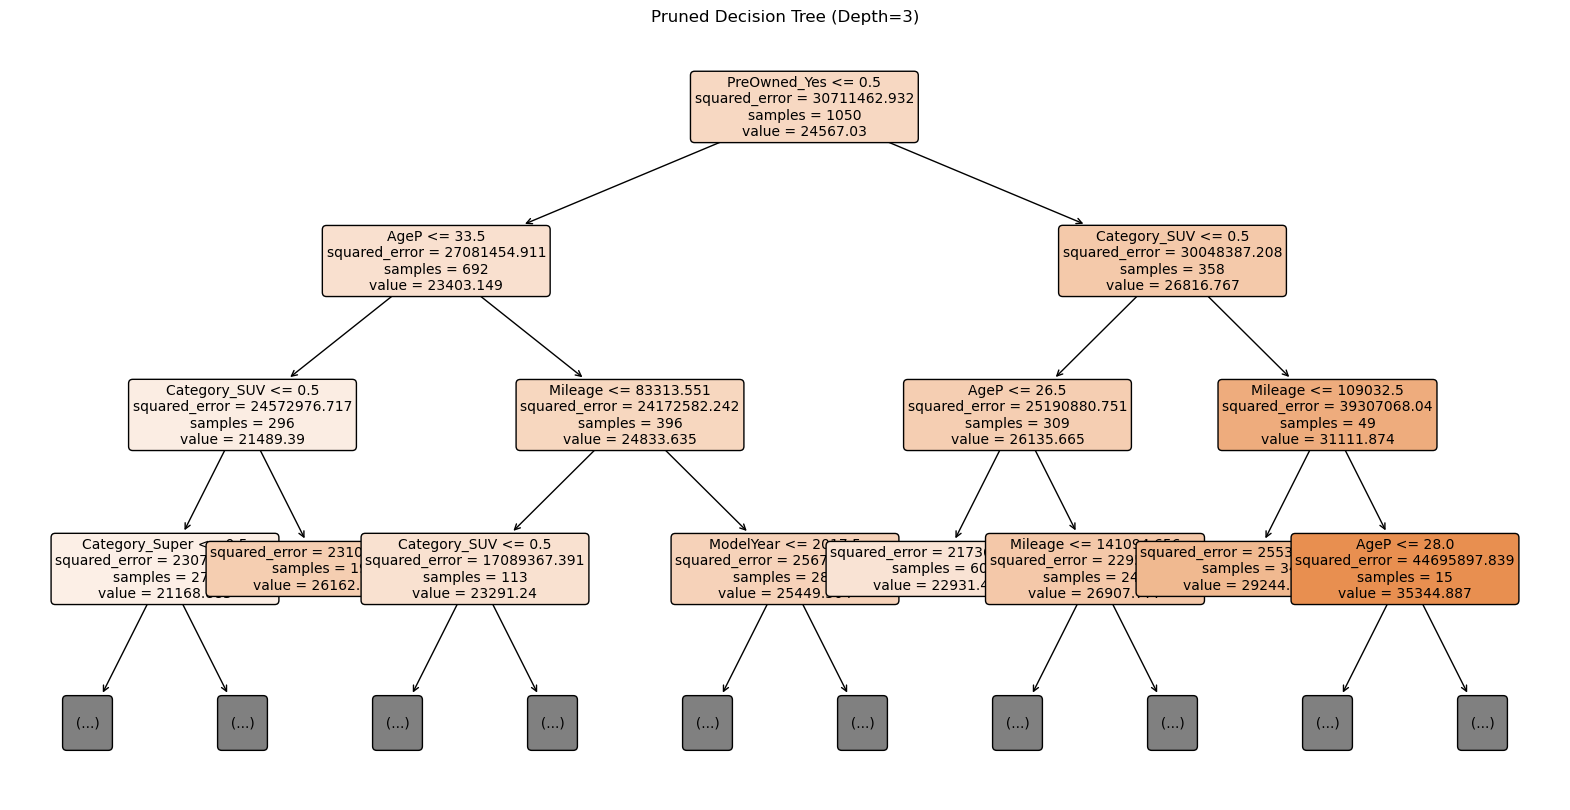

In [82]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Define the maximum depth to show (e.g., 3 levels)
max_depth = 3

# Plot the pruned decision tree with limited depth
plt.figure(figsize=(20, 10))
plot_tree(parsimonious_tree_model, 
          feature_names=X.columns, 
          filled=True, 
          rounded=True, 
          class_names=True, 
          fontsize=10, 
          max_depth=max_depth)
plt.title(f'Pruned Decision Tree (Depth={max_depth})')

# Save the plot as an image file
plt.savefig('pruned_decision_tree.png', format='png')

# Optionally, show the plot as well
plt.show()


In [84]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set using the pruned tree model
y_pred_parsimonious = parsimonious_tree_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the test set
error2 = mean_squared_error(y_test, y_pred_parsimonious)

# Print the MSE for reference
print(f"Mean Squared Error for the pruned decision tree on the test set: {error2}")


Mean Squared Error for the pruned decision tree on the test set: 28707352.33942948


In [86]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the final Decision Tree Regressor with the optimal max_leaf_nodes and random_state
final_model = DecisionTreeRegressor(random_state=0, max_leaf_nodes=best_max_leaf_nodes)

# Fit the final model to the entire dataset (if appropriate) or the training data
final_model.fit(X, y)

# Note: If you prefer to use only the training data, replace `X` and `y` with `X_train` and `y_train` respectively.


DecisionTreeRegressor(max_leaf_nodes=14, random_state=0)

Why I think a tree-based model is more appropriate than a neural network in this scenario?

A tree-based model is well-suited for this dataset because it can handle both categorical and continuous variables, is interpretable, and allows us to identify key factors that influence the claim amount. Unlike neural networks, which can be more complex and difficult to interpret, decision trees provide clear decision paths, making them ideal for understanding the impact of different factors on insurance claims.

Decision trees are relatively simple to implement and interpret, and they provide a clear visualization of how different features influence the outcome. This makes it easier to communicate the model’s insights to non-technical stakeholders, such as insurance risk managers. A decision tree is easily explained. And the process by which a particular decision flows through the decision tree, can be readily showedd.

Less complexity as these trees limit data pre-processing, which saves time for data scientists when performing feature engineering.

Interpretation of the Decision Tree

1. First Split:

Node Analysis: Examine the first split of the decision tree. For instance, if the first split is on AgeP (Age of the driver) and the criterion is <= 30, it suggests that the tree first differentiates drivers based on whether they are 30 years old or younger. Typically, younger drivers might have higher claims due to less experience, or older drivers might have higher claims due to reduced reaction times.

Recommendation: If younger drivers are associated with higher claims, it may indicate that younger drivers are more prone to accidents or claims. Insurance companies might consider adjusting premiums for younger drivers to reflect the higher risk.

2. Two Additional Nodes:

Node 1 (Mileage): Suppose another node splits on Mileage <= 10000. If this split results in significantly different claim amounts compared to higher mileage, it suggests that drivers with lower mileage might have different claim patterns. This can imply that low-mileage drivers might be less likely to file claims, potentially leading to lower premiums for them. Higher mileage often correlates with a higher likelihood of claims due to increased wear and tear or more frequent use of the vehicle.

Recommendation: Premiums could be adjusted based on the mileage of the vehicle, with higher premiums for vehicles that have higher mileage, as they pose a greater risk.

Node 2 (Category): If a split is based on Category_SUV and leads to higher claims, it suggests that owning an SUV is associated with higher claim amounts. This could be due to higher repair costs or greater accident severity for SUVs. Insurers might use this information to set higher premiums for SUV owners.

Recommendation: Implement a risk-based pricing model that considers the category of the vehicle, charging higher premiums for categories associated with higher claim amounts, such as the Super category.